# Multiple Linear Regression

## Importing the libraries

Aim: Dep upon the #hours studied , #hours slept, IQ, loc   --->predict maks

In [ ]:
import numpy as np
import pandas as pd

Creating the dataset

y = b0 +b1*x1 +b2*x2 +b3*x3 +b4*x4


In [ ]:
from numpy.random import rand

df  = pd.DataFrame(rand( 100 , 3)*100, columns = 'Hours_studied Hours_slept iQ '.split())
df.head()

,Hours_studied,Hours_slept,iQ
0,97.706564,67.254066,16.478063
1,25.241011,96.146744,28.544135
2,65.850913,15.447257,43.074570
3,84.802224,45.248848,46.597681
4,21.515027,79.955849,67.929109


In [ ]:
from random import choice
location = []
for i in range(100):
    location.append(choice(["New Delhi" , "Pune" , "Bangalore", "Nepal", "Kollam"]))
df['Location'] = location
df.head()

,Hours_studied,Hours_slept,iQ,Location
0,97.706564,67.254066,16.478063,New Delhi
1,25.241011,96.146744,28.544135,New Delhi
2,65.850913,15.447257,43.074570,Kollam
3,84.802224,45.248848,46.597681,Kollam
4,21.515027,79.955849,67.929109,Bangalore


In [ ]:
df['Marks'] = (1.73 + (3.34*df['Hours_studied'])
                    + (2.45*df['Hours_slept'])
                    + (1.83*df['iQ']  ))
df['Marks'] =  df['Marks'] +np.random.rand(100)*20

df.to_csv('Students.csv',index=False)


In [ ]:
df.to_csv('Students.csv',index=False)
df.head()

,Hours_studied,Hours_slept,iQ,Location,Marks
0,97.706564,67.254066,16.478063,New Delhi,528.817491
1,25.241011,96.146744,28.544135,New Delhi,393.178757
2,65.850913,15.447257,43.074570,Kollam,356.888876
3,84.802224,45.248848,46.597681,Kollam,498.628960
4,21.515027,79.955849,67.929109,Bangalore,403.399366


## Importing the dataset

In [ ]:
dataset = pd.read_csv('Students.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[[97.70656446710014 67.25406584384011 16.478062973217924 'New Delhi']
 [25.24101064888743 96.146744080806 28.54413501721911 'New Delhi']
 [65.85091312858026 15.447257031325831 43.074569830205824 'Kollam']
 [84.80222423945136 45.24884812347278 46.59768098321467 'Kollam']
 [21.5150267896301 79.95584926220221 67.92910927543723 'Bangalore']
 [96.10510140601689 47.18006335868399 65.885715219163 'Nepal']
 [11.333186705244191 53.46093595442982 78.01768430462081 'Pune']
 [42.68165731149364 65.06069461148863 73.75819324564618 'Kollam']
 [0.8475054844954366 16.74224358486841 74.48269656966285 'Pune']
 [90.23386836097087 82.40076784132289 7.518943989986237 'Kollam']
 [71.19158996135162 54.75920405779585 79.41658224600964 'Pune']
 [16.564913577515096 44.33011143479328 33.18041636660753 'New Delhi']
 [35.321536640477404 24.566598274732566 47.99073002423106 'Nepal']
 [81.91850580878014 42.15365050739525 14.31457647440796 'Kollam']
 [5.899032710840557 78.68084487330374 29.637648037570163 'Nepal']
 [6

In [ ]:
print(y)

[528.81749104 393.17875736 356.88887584 498.6289599  403.39936642
 568.86328843 313.95337215 441.01452588 188.6515597  521.68379237
 523.4551481  237.40202286 279.05715913 417.7587907  269.45116668
 447.42477983 263.33464588 280.77608377 206.65093263 194.93920699
 569.68199499 203.6244984  460.58187408 341.94895074 557.58809534
 339.76167731 516.94495329 279.1119822  233.06716295 632.48122884
 567.95073379 123.46766066 245.48321052 354.815448   389.19439507
 219.98085035 356.05404473 538.2515539  302.35662158 292.47276388
 469.68367382 423.50669431 510.81611395 436.75328517 453.73145207
 262.40090831 546.90112912 387.15203133 405.06359222 523.58927789
 481.09115299 499.8611166  689.12792005 510.50222737 381.1828922
 466.18707078 315.58065257 440.32350775 496.15942484 356.53387743
 633.17193824 572.23731661 479.10886897 331.12541638 612.11362655
 483.49072922 379.0444478  230.1040929  288.71940456 417.28942231
 250.24146935 542.66433832 556.35346141 463.91983889 329.45465012
 329.403918

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],  remainder='passthrough')
print(ct)

X = np.array(ct.fit_transform(X))

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [3])])


In [ ]:
print(X)

[[0.0 0.0 0.0 1.0 0.0 97.70656446710014 67.25406584384011
  16.478062973217924]
 [0.0 0.0 0.0 1.0 0.0 25.24101064888743 96.146744080806 28.54413501721911]
 [0.0 1.0 0.0 0.0 0.0 65.85091312858026 15.447257031325831
  43.074569830205824]
 [0.0 1.0 0.0 0.0 0.0 84.80222423945136 45.24884812347278
  46.59768098321467]
 [1.0 0.0 0.0 0.0 0.0 21.5150267896301 79.95584926220221
  67.92910927543723]
 [0.0 0.0 1.0 0.0 0.0 96.10510140601689 47.18006335868399 65.885715219163]
 [0.0 0.0 0.0 0.0 1.0 11.333186705244191 53.46093595442982
  78.01768430462081]
 [0.0 1.0 0.0 0.0 0.0 42.68165731149364 65.06069461148863
  73.75819324564618]
 [0.0 0.0 0.0 0.0 1.0 0.8475054844954366 16.74224358486841
  74.48269656966285]
 [0.0 1.0 0.0 0.0 0.0 90.23386836097087 82.40076784132289
  7.518943989986237]
 [0.0 0.0 0.0 0.0 1.0 71.19158996135162 54.75920405779585
  79.41658224600964]
 [0.0 0.0 0.0 1.0 0.0 16.564913577515096 44.33011143479328
  33.18041636660753]
 [0.0 0.0 1.0 0.0 0.0 35.321536640477404 24.56659827473

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test

array([516.94495329, 433.19444638, 356.88887584, 466.18707078,
       329.40391806, 501.36596919, 263.33464588, 463.91983889,
       381.1828922 , 366.13937753, 510.50222737, 551.6790698 ,
       283.32868351, 417.7587907 , 441.01452588, 567.95073379,
       460.58187408, 557.58809534, 354.815448  , 188.6515597 ])

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=1)
print("\n\n\nPredicted  Actual")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))




Predicted  Actual
[[512.3 516.9]
 [426.8 433.2]
 [350.7 356.9]
 [470.  466.2]
 [322.3 329.4]
 [506.2 501.4]
 [259.9 263.3]
 [468.9 463.9]
 [390.4 381.2]
 [359.4 366.1]
 [508.6 510.5]
 [557.4 551.7]
 [289.9 283.3]
 [417.8 417.8]
 [449.8 441. ]
 [573.6 568. ]
 [462.7 460.6]
 [549.5 557.6]
 [348.8 354.8]
 [187.9 188.7]]


In [ ]:
np.set_printoptions(precision=1)
print(np.concatenate((X_test ,y_pred.reshape(len(y_pred),1) ,y_test.reshape(len(y_test),1)) ,1))

[[0.0 0.0 0.0 1.0 0.0 91.27514147026352 17.27987506984574
  83.3903227156625 512.3330622672199 516.9449532929458]
 [0.0 0.0 1.0 0.0 0.0 42.24484790291216 90.0054209005694
  28.03619436753212 426.7816165463114 433.1944463828499]
 [0.0 1.0 0.0 0.0 0.0 65.85091312858026 15.447257031325831
  43.074569830205824 350.70271398050073 356.88887583825215]
 [0.0 0.0 1.0 0.0 0.0 84.01062483855497 62.888960819122175
  11.067748129294507 470.0105939799032 466.1870707846528]
 [0.0 0.0 0.0 1.0 0.0 37.45197310170234 38.33362392995464 49.950472243718
  322.34862257008785 329.40391806052287]
 [0.0 1.0 0.0 0.0 0.0 94.70582203870728 18.046200761766595
  71.8610857218551 506.20577356858126 501.3659691949212]
 [1.0 0.0 0.0 0.0 0.0 20.12883657578255 20.92198774668911
  71.54158129769165 259.89508564063897 263.33464588219783]
 [0.0 0.0 0.0 0.0 1.0 94.9305893019122 54.80977533459552 3.84966041090874
  468.9310047663744 463.9198388870134]
 [1.0 0.0 0.0 0.0 0.0 60.74253236719503 13.820713448486144
  77.86134773245

In [ ]:
len(y_pred)

20

In [ ]:
y_test

array([516.9, 433.2, 356.9, 466.2, 329.4, 501.4, 263.3, 463.9, 381.2,
       366.1, 510.5, 551.7, 283.3, 417.8, 441. , 568. , 460.6, 557.6,
       354.8, 188.7])

In [ ]:
y_pred

array([512.3, 426.8, 350.7, 470. , 322.3, 506.2, 259.9, 468.9, 390.4,
       359.4, 508.6, 557.4, 289.9, 417.8, 449.8, 573.6, 462.7, 549.5,
       348.8, 187.9])

Measuring average absolute difference between the predicted and actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5.145212496744543


Measuring the proportion of variance in the target variable that can be explained by the predictor variables.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9968485783005029


Visualizing the performance of the model by plotting the predicted and actual values using a scatter plot.

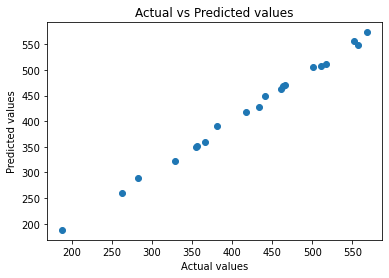

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

Introduction about the project :

The objective of this report is to analyze the relationship between the hours studied, hours slept, IQ and location of a student and their marks. We will build a multiple linear regression model to predict the marks of the student based on these factors.

Dataset :
The data used for this analysis is random which includes the number of hours a student has studied, the number of hours they slept, their IQ and their location. These variables were collected for a group of students and their corresponding marks were also recorded.

Methods:
Multiple linear regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. In this case, the dependent variable is the marks of the student and the independent variables are the hours studied, hours slept, IQ and location.

The multiple linear regression model is built by fitting a linear equation to the data. The linear equation is of the form Y = b0 + b1x1 + b2x2 + b3x3 + b4x4, where Y is the dependent variable, x1, x2, x3 and x4 are the independent variables, and b0, b1, b2, b3 and b4 are the coefficients.

The coefficients are randomly assigned. It uses the equation Marks = 1.73 + 3.34*H + 2.45*Hours_slept + 1.83*iQ, which is a linear combination of the independent variables (hours studied, hours slept, and IQ) with the corresponding coefficients (3.34, 2.45, and 1.83, respectively) plus a constant term (1.73).Once the model was built, it was used to predict the marks of a student based on the values of the independent variables.

Results:
After building the multiple linear regression model, we evaluated its performance by computing various metrics, trained the model and predicted values of the dependent  variable (student marks) for a test set. We found that the model had a good fit, with an R-squared value of 0.99, which means that 99% of the variation in the marks can be explained by the independent variables.

We also computed the mean absolute error to measure the accuracy of the model. The mean absolute error was found to be 5.14.

At last, we did a visualization of the performance of the model by plotting the predicted and actual values using a scatter plot.

Conclusion:
In this report, we built a multiple linear regression model to predict the marks of a student based on the hours studied, hours slept, IQ and location. The model showed a good fit and had a high R-squared value. This suggests that the independent variables have a strong relationship with the dependent variable and can be used to predict the marks of the student with reasonable accuracy.